In [1]:
### Importing Libraries, incl. Data Viz
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
### Create datapath to '02 Data'
datapath = r'/Users/gabrielconfrey/Desktop/Data Analysis/Career Foundry/Achievement 4/082023 Instacart Basket Analysis/02 Data'

In [3]:
### Create datapath to 'Basket Analysis'
basket = r'/Users/gabrielconfrey/Desktop/Data Analysis/Career Foundry/Achievement 4/082023 Instacart Basket Analysis'

In [4]:
# Importing df 48_cleaned from 4.7
df = pd.read_pickle(os.path.join(datapath, '2 Prepared Data', '410_merged.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,loyalty_flag,spending_flag,median_ord_time,prior_order_flag,first name,last name,age,dependents,marital_status,income
0,2539329,1,1,2,8,7.0,196,1,0,195,...,New customer,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,New customer,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,New customer,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,New customer,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,New customer,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423


In [6]:
### Because I took away State from the df in the last module, I need to add it back by merging this dataframe with the one before I cleaned it.
### Importing original customers dataset as 'customers'
customers = pd.read_csv(os.path.join(datapath, '1 Original Data', '4.9 Data Download', 'customers.csv'))

In [7]:
customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [169]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [8]:
### Merging dfs on 'user_id', to add STATE back in.
### First step is to create a new df with just the 'user_id' and 'STATE' columns to make joining easier.
custmini = customers[['user_id','STATE']]

In [9]:
custmini.head()

,user_id,STATE
0,26711,Missouri
1,33890,New Mexico
2,65803,Idaho
3,125935,Iowa
4,130797,Maryland


In [10]:
### Now joining custmini and df
dfmerge = df.merge(custmini, on = ['user_id'])

In [11]:
dfmerge.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,spending_flag,median_ord_time,prior_order_flag,first name,last name,age,dependents,marital_status,income,STATE
0,2539329,1,1,2,8,7.0,196,1,0,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
2,473747,1,3,3,12,21.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
4,431534,1,5,4,15,28.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama


In [12]:
### Renaming STATE to state
dfmerge.rename(columns = {'STATE':'state'}, inplace = True)

In [13]:
dfmerge.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,spending_flag,median_ord_time,prior_order_flag,first name,last name,age,dependents,marital_status,income,state
0,2539329,1,1,2,8,7.0,196,1,0,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
2,473747,1,3,3,12,21.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
4,431534,1,5,4,15,28.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama


In [170]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   time_of_order           int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   Unnamed: 0              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float64
 14  price_range_loc         object 
 15  traffic_level           object 
 16  traffic_level2          object 
 17  busiest_times           object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  spending_flag           objec

## Now that I have added the 'state' column back into the data, here are the "To-Dos" for project 4.10:

### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
 - Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Use linked page to segregate regions
 - Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
 - Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
 - Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.(Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
 - Create an appropriate visualization to show the distribution of profiles.
 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
 - Compare your customer profiles with regions and departments. Is there a link? Customers may demonstrate different behaviors across regions, which could make this information important.
 - Produce suitable charts to illustrate your results and export them in your project folder.
 - Tidy up your script, export your final data set, and save your notebook.

### Security Implications

In [15]:
dfmerge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'traffic_level', 'traffic_level2', 'busiest_times',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'median_ord_time', 'prior_order_flag', 'first name', 'last name', 'age',
       'dependents', 'marital_status', 'income', 'state'],
      dtype='object')

### Securing implications would be any personally identifiable information such as names, contact info, addresses. In the used dataframe, the colunns for first name, last name are the most obvious, with age, dependents, marital status and state potentially being at risk, especially when paired with other information. Taking steps within an organization to secure this data is important.

### Create regional identifiers

#### Region One: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York ,Pennsylvania, New Jersey
#### Region Two: Wisconsin, Michigan, Illinois, Indiana, Ohio,, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri
#### Region Three: Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana
#### Region Four: Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii

### Creating "region" flag using function
def region(row):
    if row['state'] == ("Maine" or "New Hampshire" or "Vermont" or "Massachusetts" or "Rhode Island" or "Connecticut" or "New York" or "Pennsylvania" or "New Jersey"):
        return 'Northeast'
    elif row['state'] == ("Wisconsin" or "Michigan" or "Illinois" or "Indiana" or "Ohio" or "North Dakota" or "South Dakota" or "Nebraska" or "Kansas" or "Minnesota" or "Iowa" or "Missouri"):
        return 'Midwest'
    elif row['state'] == ("Delaware" or "Maryland" or "District of Columbia" or "Virginia" or "West Virginia" or "North Carolina" or "South Carolina" or "Georgia" or "Florida" or "Kentucky" or "Tennessee" or "Mississippi" or "Alabama" or "Oklahoma" or "Texas" or "Arkansas" or "Louisiana"):
        return 'South'
    else: return 'West'

# Applying function
dfmerge['region'] = dfmerge.apply(region, axis=1)

In [31]:
dfmerge.drop(columns = ['region'])

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,spending_flag,median_ord_time,prior_order_flag,first name,last name,age,dependents,marital_status,income,state
0,2539329,1,1,2,8,7.0,196,1,0,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
2,473747,1,3,3,12,21.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
4,431534,1,5,4,15,28.0,196,1,1,195,...,Low spender,20.0,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,19676,...,High spender,7.0,Frequent customer,Gerald,Yates,25,0,single,53755,Hawaii
32404855,484769,66343,1,6,11,7.0,47210,1,0,47214,...,Low spender,24.5,Non-frequent customer,Jacqueline,Arroyo,22,3,married,46151,Tennessee
32404856,1561557,66343,2,1,11,30.0,47210,1,1,47214,...,Low spender,24.5,Non-frequent customer,Jacqueline,Arroyo,22,3,married,46151,Tennessee
32404857,276317,66343,3,6,15,19.0,47210,1,1,47214,...,Low spender,24.5,Non-frequent customer,Jacqueline,Arroyo,22,3,married,46151,Tennessee


## Trying to create region column with lists and iloc instead:

In [32]:
Northwest = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [33]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [34]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [35]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

### Using lists to populate new column 'region'

In [37]:
dfmerge.loc[dfmerge['state'].isin(Northwest), 'region'] = 'Northwest'

In [38]:
dfmerge.loc[dfmerge['state'].isin(Midwest), 'region'] = 'Midwest'

In [39]:
dfmerge.loc[dfmerge['state'].isin(South), 'region'] = 'South'

In [40]:
dfmerge.loc[dfmerge['state'].isin(West), 'region'] = 'West'

In [41]:
dfmerge['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northwest     5722736
Name: count, dtype: int64

In [43]:
# Checking for empty rows
dfmerge['region'].isna().sum()

0

### Analyze spending by region

In [45]:
### Checking column names again
dfmerge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'traffic_level', 'traffic_level2', 'busiest_times',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'median_ord_time', 'prior_order_flag', 'first name', 'last name', 'age',
       'dependents', 'marital_status', 'income', 'state', 'region'],
      dtype='object')

In [46]:
### And value count of spending flag
dfmerge['spending_flag'].value_counts()

spending_flag
Low spender     21760937
High spender    10643922
Name: count, dtype: int64

In [47]:
### Checking high and low spending totals by region
dfmerge.groupby(['region', 'spending_flag']).size()

region     spending_flag
Midwest    High spender     2497034
           Low spender      5100291
Northwest  High spender     1875170
           Low spender      3847566
South      High spender     3549625
           Low spender      7242260
West       High spender     2722093
           Low spender      5570820
dtype: int64

#### Across regions, high spenders are outnumbered by low spenders at roughly 1:2

## Create exclusion flag for customers with less than 5 orders, export sample

In [48]:
dfmerge['max_order'].value_counts

<bound method IndexOpsMixin.value_counts of 0           10
1           10
2           10
3           10
4           10
            ..
32404854    26
32404855     4
32404856     4
32404857     4
32404858     4
Name: max_order, Length: 32404859, dtype: int64>

In [49]:
### Creating new flags based on max order count
dfmerge.loc[dfmerge['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [50]:
dfmerge.loc[dfmerge['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [51]:
dfmerge.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,prior_order_flag,first name,last name,age,dependents,marital_status,income,state,region,activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,195,...,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,195,...,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,195,...,Regular customer,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity


In [52]:
dfmerge['activity_flag'].value_counts()

activity_flag
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [53]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   time_of_order           int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   Unnamed: 0              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float64
 14  price_range_loc         object 
 15  traffic_level           object 
 16  traffic_level2          object 
 17  busiest_times           object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  spending_flag           objec

In [54]:
### Create a df of just active customers
dfactive = dfmerge[dfmerge['activity_flag'] == 'High activity']

In [55]:
dfactive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   time_of_order           int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   Unnamed: 0              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float64
 14  price_range_loc         object 
 15  traffic_level           object 
 16  traffic_level2          object 
 17  busiest_times           object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  spending_flag           object 
 2

#### Export sample

In [57]:
# Export data to pkl
dfactive.to_pickle(os.path.join(datapath, '2 Prepared Data', '410active.pkl'))

#### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.(Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [69]:
### Customers can be: young, middle aged, old ; morning shoppers, afternoon shoppers (before/after 12); w/ children, w/o children.
### Need to see distribution of age to create segments.
dfactive['age'].median()

49.0

In [70]:
dfactive['age'].min()

18

In [71]:
dfactive['age'].max()

81

In [72]:
81-18

63

In [73]:
63/3

21.0

#### Using the min and max of the column 'age', I'll split age groups into 18-39, 40-61, 62-81.

In [75]:
### For each age group, I'll tag morning (0-11,12-23), dependents (0, >0)
dfactive['time_of_order'].value_counts()

time_of_order
10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: count, dtype: int64

In [76]:
dfactive['dependents'].value_counts()

dependents
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

### Creating my flags

In [80]:
dfactive.loc[(dfactive['age'] <= 39) & (dfactive['time_of_order'] <= 11), 'daytime_age'] = 'Young morning'

In [81]:
dfactive.loc[(dfactive['age'] <= 39) & (dfactive['time_of_order'] > 11), 'daytime_age'] = 'Young evening'

In [85]:
dfactive.loc[(dfactive['age'] > 39) & (dfactive['age'] < 62) & (dfactive['time_of_order'] <= 11), 'daytime_age'] = 'Middle-aged morning'

In [87]:
dfactive.loc[(dfactive['age'] > 39) & (dfactive['age'] < 62) & (dfactive['time_of_order'] > 11), 'daytime_age'] = 'Middle-aged evening'

In [88]:
dfactive.loc[(dfactive['age'] >= 62) & (dfactive['time_of_order'] <= 11), 'daytime_age'] = 'Old morning'

In [89]:
dfactive.loc[(dfactive['age'] >= 62) & (dfactive['time_of_order'] > 11), 'daytime_age'] = 'Old evening'

In [90]:
dfactive.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,first name,last name,age,dependents,marital_status,income,state,region,activity_flag,daytime_age
0,2539329,1,1,2,8,7.0,196,1,0,195,...,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity,Young morning
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity,Young morning
2,473747,1,3,3,12,21.0,196,1,1,195,...,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity,Young evening
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity,Young morning
4,431534,1,5,4,15,28.0,196,1,1,195,...,Linda,Nguyen,31,3,married,40423,Alabama,South,High activity,Young evening


In [94]:
dfactive['daytime_age'].value_counts().sum()

30964564

In [95]:
dfactive['daytime_age'].value_counts()

daytime_age
Middle-aged evening    6877183
Young evening          6867515
Old evening            6220964
Young morning          3797595
Middle-aged morning    3773279
Old morning            3428028
Name: count, dtype: int64

In [109]:
# Defining order of daytime_age

desired_order = ['Young morning','Young evening','Middle-aged morning','Middle-aged evening','Old morning','Old evening']

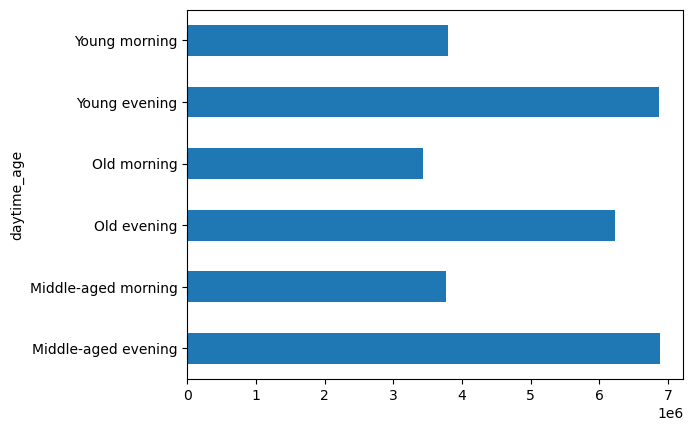

In [171]:
profiles_barchart = dfactive['daytime_age'].value_counts()[desired_order].sort_index().plot.barh()

#### Most customers, regardless of age, place orders after noon.

In [115]:
# Export chart

profiles_barchart.figure.savefig(os.path.join(basket, '04 Analysis','Visualizations', '410profilesbar.png'))

### Aggregate mix/max of usage frequency and expenditure for each profile.

In [116]:
# Defining order of daytime_age

desired_order = ['Young morning','Young evening','Middle-aged morning','Middle-aged evening','Old morning','Old evening']

In [117]:
# Mean, min, and max of the total order numbers and item prices

dfactive.groupby('daytime_age').agg({'max_order': ['min', 'median', 'mean', 'max'], 'prices': ['min', 'median', 'mean', 'max']}).loc[desired_order]

max_order                       prices                    \
                          min median       mean max    min median       mean   
daytime_age                                                                    
Young morning               5   30.0  36.192975  99    1.0    7.3  12.043911   
Young evening               5   27.0  33.569611  99    1.0    7.4  12.062165   
Middle-aged morning         5   30.0  36.176857  99    1.0    7.4  12.219216   
Middle-aged evening         5   27.0  33.413726  99    1.0    7.4  11.616551   
Old morning                 5   30.0  35.987717  99    1.0    7.3  11.766004   
Old evening                 5   27.0  33.487696  99    1.0    7.4  11.993550   

                              
                         max  
daytime_age                   
Young morning        99999.0  
Young evening        99999.0  
Middle-aged morning  99999.0  
Middle-aged evening  99999.0  
Old morning          99999.0  
Old evening          99999.0

### By expenditure...

In [118]:
dfactive.groupby('daytime_age').agg({'prices': 'sum'}).loc[desired_order]

,prices
daytime_age,
Young morning,45737895.9
Young evening,82837097.8
Middle-aged morning,46106510.9
Middle-aged evening,79889144.5
Old morning,40334190.9
Old evening,74611441.6


In [119]:
### Aggregate price
dfactive.groupby(['daytime_age', 'region']).agg({'prices': 'sum'}).loc[desired_order]

prices
daytime_age         region               
Young morning       Midwest    12774136.2
                    Northwest   6743212.7
                    South      15846272.5
                    West       10374274.5
Young evening       Midwest    21497122.6
                    Northwest  13473968.8
                    South      29220920.4
                    West       18645086.0
Middle-aged morning Midwest    11178951.2
                    Northwest   8564190.8
                    South      15001028.8
                    West       11362340.1
Middle-aged evening Midwest    20245788.1
                    Northwest  13602172.4
                    South      25335827.3
                    West       20705356.7
Old morning         Midwest     9037781.8
                    Northwest   7532481.3
                    South      14371766.9
                    West        9392160.9
Old evening         Midwest    17355527.9
                    Northwest  13160547.7
                    South      25183278.3
                    West       18912087.7

In [120]:
### Aggregate price
dfactive.groupby(['region']).agg({'prices': 'sum'})

,prices
region,
Midwest,92089307.8
Northwest,63076573.7
South,124959094.2
West,89391305.9


# NOTE! Mistake made, 'region' value of "Northwest" should be "Northeast"

In [125]:
dfactive['region'] = dfactive['region'].replace('Northwest','Northeast')

/var/folders/t0/2pp7bcps729654l63mn9fmhh0000gn/T/ipykernel_5473/1937766739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfactive['region'] = dfactive['region'].replace('Northwest','Northeast')


In [126]:
dfactive['region'].value_counts()

region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

### Fixed

In [127]:
### Aggregate price
dfactive.groupby(['region']).agg({'prices': 'sum'})

,prices
region,
Midwest,92089307.8
Northeast,63076573.7
South,124959094.2
West,89391305.9


In [128]:
### Aggregate price
dfactive.groupby(['daytime_age', 'region']).agg({'prices': 'sum'}).loc[desired_order]

prices
daytime_age         region               
Young morning       Midwest    12774136.2
                    Northeast   6743212.7
                    South      15846272.5
                    West       10374274.5
Young evening       Midwest    21497122.6
                    Northeast  13473968.8
                    South      29220920.4
                    West       18645086.0
Middle-aged morning Midwest    11178951.2
                    Northeast   8564190.8
                    South      15001028.8
                    West       11362340.1
Middle-aged evening Midwest    20245788.1
                    Northeast  13602172.4
                    South      25335827.3
                    West       20705356.7
Old morning         Midwest     9037781.8
                    Northeast   7532481.3
                    South      14371766.9
                    West        9392160.9
Old evening         Midwest    17355527.9
                    Northeast  13160547.7
                    South      25183278.3
                    West       18912087.7

In [142]:
# Crosstab by daytime_age

xtab_timeage = pd.crosstab(dfactive['daytime_age'], dfactive['region'], dropna = False).loc[desired_order]

In [143]:
xtab_timeage

region,Midwest,Northeast,South,West
daytime_age,,,,
Young morning,891649,660631,1288031,957284
Young evening,1591352,1211106,2320216,1744841
Middle-aged morning,880431,661988,1244506,986354
Middle-aged evening,1636592,1202879,2263786,1773926
Old morning,800387,615911,1145853,865877
Old evening,1461102,1112170,2048747,1598945


### Appropriate visualization of crosstab

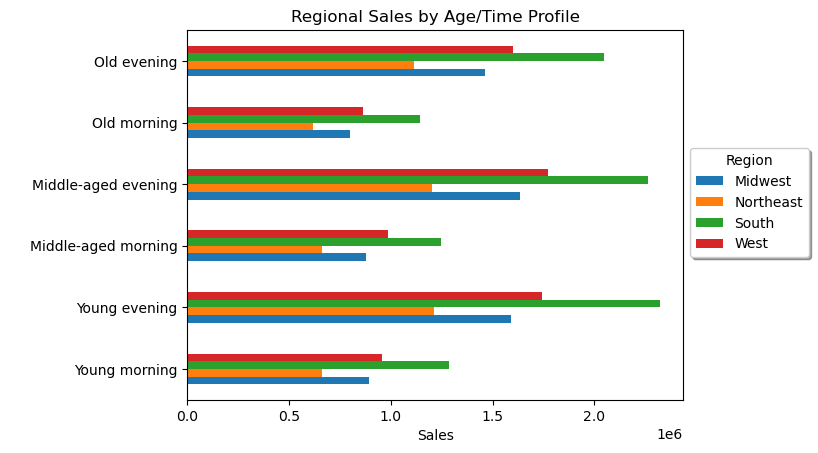

In [161]:
# Stacked bar chart

stackedprofile_bar = xtab_timeage.plot.barh()

plt.title('Regional Sales by Age/Time Profile')
plt.ylabel(' ')
plt.xlabel('Sales')
plt.legend(title='Region', bbox_to_anchor=(1, .7), fancybox=True, shadow=True)

In [164]:
# Export chart

stackedprofile_bar.figure.savefig(os.path.join(basket, '04 Analysis','Visualizations', 'stackedprofile_bar.png'))

In [145]:
# Crosstab by region

xtab_region = pd.crosstab(dfactive['region'], dfactive['daytime_age'], dropna = False)

In [162]:
xtab_region

daytime_age,Middle-aged evening,Middle-aged morning,Old evening,Old morning,Young evening,Young morning
region,,,,,,
Midwest,1636592,880431,1461102,800387,1591352,891649
Northeast,1202879,661988,1112170,615911,1211106,660631
South,2263786,1244506,2048747,1145853,2320216,1288031
West,1773926,986354,1598945,865877,1744841,957284


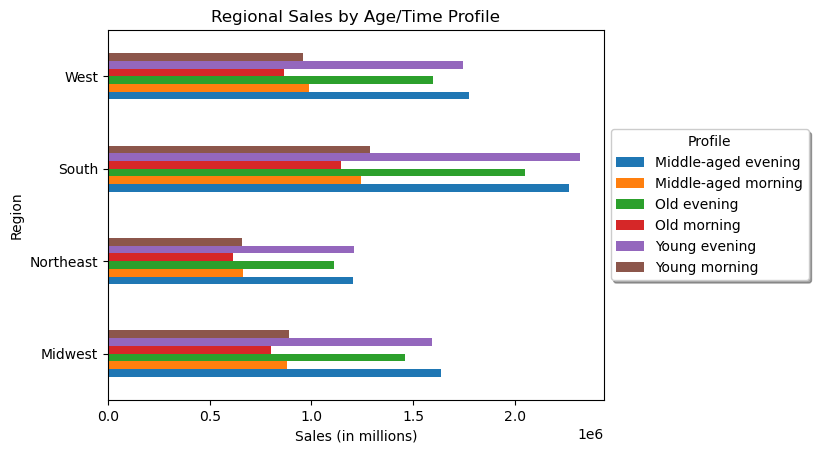

In [165]:
# Stacked bar chart

stackedregion_bar = xtab_region.plot.barh()

plt.title('Regional Sales by Age/Time Profile')
plt.ylabel('Region')
plt.xlabel('Sales (in millions)')
plt.legend(title='Profile', bbox_to_anchor=(1, .75), fancybox=True, shadow=True)

In [166]:
# Export chart

stackedregion_bar.figure.savefig(os.path.join(basket, '04 Analysis','Visualizations', 'stackedregion_bar.png'))

### This visualization appears to show that South sales are greater than all other regions, and that afternoon sales are 2x morning sales, no matter the age group.

### However, the South is a much larger region, including more states and potentially higher populations, so the overall visualization may be misleading. It's better to pay attention to the ratios of each profile between morning/afternoon, which are all fairly consistent.

In [167]:
### Exporting dfactive
dfactive.to_pickle(os.path.join(datapath, '2 Prepared Data', '410active2.pkl'))

In [168]:
dfactive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   time_of_order           int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   Unnamed: 0              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float64
 14  price_range_loc         object 
 15  traffic_level           object 
 16  traffic_level2          object 
 17  busiest_times           object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  spending_flag           object 
 2